In [241]:
import numpy as np
import matplotlib.pyplot as plt

In [242]:
def epsilon(X):
    e = []
    for x in X:
        if x >= 0 and x <= 0.5:
            e.append(1.)
        else:
            e.append(2.)
    
    return np.array(e)  

In [264]:
N     = 1000
x_min = 0
x_max = 1
step  = (x_max-x_min)/N
X     = np.linspace(x_min, x_max, N)

# parameters
a = 0.2
b = 0.4

# boundary conditions
f1bc = 0
fNbc = 0

# q(x)
q = np.ones(N)
q[X < a] = -(b-a)/(1-(b-a))
q[X > b] = -(b-a)/(1-(b-a))

print("Length of X: {}".format(len(X)))
print("Start: {}\nEnd: {}".format(X[:5], X[-5:]))
print("Step: {}".format(step))

Length of X: 1000
Start: [0.       0.001001 0.002002 0.003003 0.004004]
End: [0.995996 0.996997 0.997998 0.998999 1.      ]
Step: 0.001


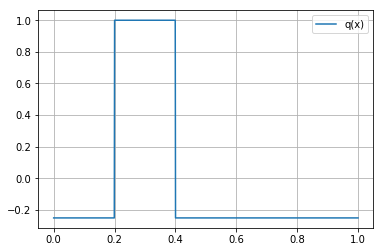

In [266]:
plt.plot(X, q, label = "q(x)")
plt.legend()
plt.grid()
plt.show()

In [272]:
# Matrix
lower = X - 0.5*step  # -1/2
upper = X + 0.5*step  # +1/2

e_lower = epsilon(lower)  # epsilon for i-1/2
e_upper = epsilon(upper)  # epsilon for i+1/2

d = -e_upper-e_lower  # diagonal value
s = e_upper[1:]         # subdiagonal value (first value excluded, see initial condition)

M = np.diag(d) + np.diag(s, k=1) + np.diag(s, k=-1)  # create matrix

print("Matrix without boundary conditions:\n{}".format(M))

"""
TODO: The update seems to be wrong
"""

# Update with boundary conditions
M[0,0]     = -e_upper[0] - 2*e_lower[0]      # first row
M[N-1,N-1] = -2*e_upper[N-1] - e_lower[N-1]  # last row

print("Matrix with boundary conditions:\n{}".format(M))

Matrix without boundary conditions:
[[-3.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  2.  0.]
 [ 0.  0.  0. ...  2. -4.  2.]
 [ 0.  0.  0. ...  0.  2. -4.]]
Matrix with boundary conditions:
[[-5.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  2.  0.]
 [ 0.  0.  0. ...  2. -4.  2.]
 [ 0.  0.  0. ...  0.  2. -6.]]


In [260]:
# Check sum over rows
M_sum = M.sum(axis=1)
print(M_sum[M_sum != 0])
print(M_sum)

[1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [277]:
# q update
q_      = np.zeros(N)
q_[0]   = -2*e_lower[0]*f1bc/(step)**2
q_[N-1] = -2*e_upper[N-1]*fNbc/(step)**2

print("Update of q:\ni=1: {}, i=N: {}".format(q_[0], q_[N-1]))

Update of q:
i=1: -0.0, i=N: -0.0


In [280]:
qt = np.dot(M, q) + q_

print("Check boundary conditions: {}, {}".format(qt[0], qt[N-1]))  # TODO: should be zero here

Check boundary conditions: 1.0, 1.0


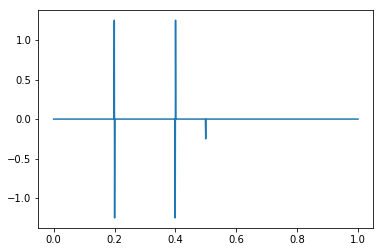

In [263]:
plt.plot(X, qt)
plt.show()